# "Global Happiness: Exploring Factors that Shape Well-being"
#### Stella Wroblewski
[Link to my GitHub webpage](https://swroblewski-tu.github.io/)

If running the notebook, please download the csv for the datasets linked below 

## Project Questions


1. Main Research Question:
How do socio-economic factors, quality of life indices, and dietary patterns contribute to the subjective well- being of individuals in different countries?

2. Happiness and Quality of Life:
To what extent does the Quality of Life Index align with reported happiness scores in different countries?
How do specific quality of life indicators (e.g., purchasing power, safety, healthcare) correlate with reported happiness?

3. Correlation between Quality of Life and Cost of Living:
What is the relationship between Quality of Life and Cost of Living, and how does it vary among countries?

4. Feature Importance for Happiness Prediction:
Which features contribute the most to the prediction of Happiness Scores, and how do these align with conventional wisdom or societal expectations?

5. Clustering and Regional Patterns:
Are there discernible regional patterns in happiness and quality of life indices, and how are these influenced by socio-economic and food-related factors?

6. Impact of Dietary Patterns on Happiness:
To what extent do different diets, such as Mediterranean or vegetarian, impact reported happiness scores?
Can specific food-related variables from the dataset be identified as significant predictors of happiness?

7. Ensemble Models and Predictive Accuracy:
How does the predictive accuracy of ensemble models, combining various base models, compare to individual models in predicting Happiness Scores?

8. Causal Relationships between Diet and Happiness:
Can causal relationships be inferred between changes in diet composition and reported happiness, accounting for potential confounding factors?

## Project Datasets


### Diet by country



[Link to FAO food balance data](https://www.fao.org/faostat/en/#data/FBS)

[Link to FAO food balance data CSV (2019_food_data.csv)](https://github.com/swroblewski-tu/swroblewski-tu.github.io)

This dataset comes from the Food and Agriculture Organization of the United Nations. This data is collected every year and has been cited in numerous academic studies as well as National Geographic as a way to understand food consumption by country. For the scope of this project we will only be using the 2019 data. All data has been previously normalized to population. The main measure in this dataset that will be used is food supply quantity (how much of a certain food is in the food supply by weight). The data also divides into categories of where the food is going such as livestock, waste, seed for new crops, tourists, etc. 


### Quality of Life by country



[Link to Quality of Life data](https://www.numbeo.com/quality-of-life/rankings_by_country.jsp?title=2019)

This dataset comes from the website numbeo is the largest database of crowdsourced information regarding cost of living and quality of life. Because of the crowd sourcing nature of the data, there is a much wider scope of the countries included compared to other sources. For the scope of this project we will only be using the 2019 data. A description of the metrics used taken from the website orginally can be found below. 


"Quality of Life Index is an estimation of the overall quality of life in a city or country.It takes into account various factors that impact one's quality of life, including purchasing power, pollution levels, housing affordability, cost of living, safety, healthcare quality, commute times, and climate conditions. The index is designed to provide a comparative measure, where a higher index value indicates a better quality of life.

It's important to note that the Quality of Life Index is based on data and user surveys collected by Numbeo. The surveys capture the perceptions and experiences of visitors to the website regarding various aspects of quality of life. Numbeo strives to provide accurate and up-to-date information by filtering out potential spam and ensuring a sufficient number of contributors for each city or country.

The index is calculated using an empirical formula that assigns weights to each factor based on its importance. The specific formula used by Numbeo may vary and is subject to change. It combines the data collected for each factor to generate a numerical value that represents the quality of life in a particular location.

The Quality of Life Index (higher is better) is an estimation of the overall quality of life by using an empirical formula that takes into account the following factors:

Purchasing Power Index (higher is better)
Pollution Index (lower is better)
House Price to Income Ratio (lower is better)
Cost of Living Index (lower is better)
Safety Index (higher is better)
Health Care Index (higher is better)
Traffic Commute Time Index (lower is better)
Climate Index (higher is better)"

### Happiness by country



[Link to World Happiness Report](https://worldhappiness.report/ed/2019/#appendices-and-data)

[Link to World Happiness Report data](https://worldhappiness.report/data/)

[Link to World Happiness Report data CSV (2019_happiness_data.csv)](https://github.com/swroblewski-tu/swroblewski-tu.github.io)


This dataset comes from the "World Happiness Report". This data is collected every year and has been cited in numerous academic studies as a way to understand percieved happiness by country. For the scope of this project we will only be using the 2019 data. A description of the metrics used taken from the project orginally can be found below. 

"The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. The World Happiness Report 2019 focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes."

## Proposed Models


1. Prediction Model with Expanded Features:
Build an enhanced happiness prediction model using a combination of socio-economic features, quality of life indices, and additional features from the food dataset (e.g., diet composition, food availability).
Objective: Understand how a broader set of features, including food-related variables, contributes to predicting happiness.

2. Food Impact Analysis Model:
Develop a model to analyze the impact of different diets (e.g., Mediterranean, vegetarian) on happiness scores, considering both quality of life indices and happiness data.
Objective: Investigate the relationship between specific dietary patterns and subjective well-being, providing insights into the role of food in happiness.

3. Regional Happiness Clustering with Food Factors:
Apply clustering algorithms to group countries based on happiness scores, quality of life indices, and food-related features.
Objective: Identify regional patterns in well-being, considering both socio-economic factors and dietary habits.

4. Happiness Prediction with Ensemble Models:
Utilize ensemble models to combine predictions from multiple base models, including linear regression, random forest, and potentially models focused on food factors.
Objective: Improve predictive accuracy by leveraging the strengths of different modeling approaches.

5. Causal Inference Analysis:
Apply causal inference techniques to investigate potential causal relationships between food-related variables and happiness, addressing confounding factors.
Objective: Explore whether changes in diet composition have a causal impact on happiness, considering potential interventions.



## Extracting and Loading Datasets

##### Import necessary libraries: 

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans


#### Extracting and Loading Quality of Life Dataset

##### Scrape/extract quality of life table data: 

In [2]:
import requests
from bs4 import BeautifulSoup
# fetch the url 
url = "https://www.numbeo.com/quality-of-life/rankings_by_country.jsp?title=2019"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# locate the table
table = soup.find('table', {'id': 't2'})

# extract the data from the table as needed
data = []
for row in table.find_all('tr')[1:]:  # skip the header row
    cols = row.find_all('td')
    country = cols[1].text.strip()
    quality_of_life_index = cols[2].text.strip()
    cost_of_living_index = cols[3].text.strip()
    property_price_to_income_ratio = cols[4].text.strip()
    traffic_commute_time_index = cols[5].text.strip()

    data.append([country, quality_of_life_index, cost_of_living_index,
                 property_price_to_income_ratio, traffic_commute_time_index])


##### Create pandas data frame and correct data types:

In [3]:
# create dataframe and tidy the data
qol_data = pd.DataFrame(data, columns=['Country', 'Quality of Life Index', 'Cost of Living Index',
                                     'Property Price to Income Ratio', 'Traffic Commute Time Index'])

# convert to appropriate data types
qol_data['Quality of Life Index'] = qol_data['Quality of Life Index'].astype(float)
qol_data['Cost of Living Index'] = qol_data['Cost of Living Index'].astype(float)
qol_data['Property Price to Income Ratio'] = qol_data['Property Price to Income Ratio'].astype(float)
qol_data['Traffic Commute Time Index'] = qol_data['Traffic Commute Time Index'].astype(float)


qol_data['Country'] = qol_data['Country'].replace({'United States': 'United States of America'})

print(qol_data.head())

       Country  Quality of Life Index  Cost of Living Index  \
0      Denmark                  198.6                 114.4   
1  Switzerland                  195.9                 129.7   
2      Finland                  194.0                 112.3   
3    Australia                  191.1                 122.9   
4      Austria                  191.1                  96.7   

   Property Price to Income Ratio  Traffic Commute Time Index  
0                            75.8                        79.4  
1                            78.5                        72.7  
2                            77.2                        73.5  
3                            57.2                        76.4  
4                            78.6                        79.2  


#### Extracting and Loading Happiness Dataset

In [4]:
import pycountry 

happiness_data = pd.read_csv("2019_happiness_data.csv")

def standardize_country_names(name):
    # Try to get the country object
    country = pycountry.countries.get(name=name)
    if country:
        return country.name

    # If the country wasn't found by name, try searching by common name
    for country in pycountry.countries:
        if name.lower() in country.name.lower():
            return country.name

    # Return the original name if no match was found
    return name
happiness_data['Country'] = happiness_data['Country'].apply(standardize_country_names)
qol_data['Country'] = qol_data['Country'].apply(standardize_country_names)

# Update the manual mapping dictionary
manual_mapping = {
    # Existing mappings
    'Hong Kong S.A.R. of China': 'Hong Kong',
    'Taiwan Province of China' : 'Taiwan, Province of China'

}
# Apply the updated manual mapping to both datasets
happiness_data['Country'] = happiness_data['Country'].replace(manual_mapping)
qol_data['Country'] = qol_data['Country'].replace(manual_mapping)

# merge quality of life and happiness datasets
merged_data = pd.merge(happiness_data, qol_data, on='Country', how='left')

print(merged_data.head())

       Country  Happiness score  Whisker-high  Whisker-low  \
0      Finland            7.769         7.830        7.708   
1      Denmark            7.600         7.667        7.534   
2       Norway            7.554         7.616        7.492   
3      Iceland            7.494         7.613        7.374   
4  Netherlands            7.488         7.542        7.433   

   Dystopia (1.88) + residual  Explained by: GDP per capita  \
0                       2.714                         1.340   
1                       2.393                         1.383   
2                       2.241                         1.488   
3                       2.401                         1.380   
4                       2.393                         1.396   

   Explained by: Social support  Explained by: Healthy life expectancy  \
0                         1.587                                  0.986   
1                         1.573                                  0.996   
2                         

#### Extracting and Loading Food Dataset

In [5]:
food_data = pd.read_csv("2019_food_data.csv")

manual_mapping = {
    # Existing mappings
    'Tanzania, United Republic of': 'United Republic of Tanzania',
    'Viet Nam': 'Vietnam',
    'Russian Federation': 'Russia',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'Republic of Korea': 'South Korea',
    'Iran (Islamic Republic of)': 'Iran',
    'Czechia': 'Czech Republic',
    'Netherlands (Kingdom of the)' : 'Netherlands'
}


# Apply the updated manual mapping to both datasets
merged_data['Country'] = merged_data['Country'].replace(manual_mapping)
food_data['Area'] = food_data['Area'].replace(manual_mapping)

# Apply the standardization function to country columns
merged_data['Country'] = merged_data['Country'].apply(standardize_country_names)
food_data['Area'] = food_data['Area'].apply(standardize_country_names)

# Merge the datasets
final_merged_data = pd.merge(merged_data, food_data, left_on='Country', right_on='Area', how='inner')

## Exploratory Data Analysis (EDA)

### Find the top 5 countries with the highest quality of life scores:

In [6]:
import matplotlib.pyplot as plt

# find the top 5 countries with the highest QOL score
top_5_qol = qol_data.nlargest(5, 'Quality of Life Index')

# show top five QOL countries
print("Top 5 Countries with the Highest Quality of Life Index:")
top_5_qol[['Country', 'Quality of Life Index']]

Top 5 Countries with the Highest Quality of Life Index:


,Country,Quality of Life Index
0,Denmark,198.6
1,Switzerland,195.9
2,Finland,194.0
3,Australia,191.1
4,Austria,191.1


### Display initial summary statstics for the quality of life dataset

In [7]:
# find initial summary stats
summary_stats = qol_data.describe()

# show summary stats
print("\nSummary Statistics for Quality of Life Data:")
summary_stats[['Quality of Life Index']]


Summary Statistics for Quality of Life Data:


,Quality of Life Index
count,71.000000
mean,142.311268
std,32.931416
min,84.000000
25%,113.000000
50%,145.700000
75%,169.050000
max,198.600000


### Graph 1: the quality of life scores against cost of living. The scatter plot reveals a strong positive correlation between Quality of Life Index and Cost of Living Index. 

#### This correlation suggests that countries with higher Quality of Life tend to have higher costs of living. This may be attributed to better amenities, healthcare, and overall standards of living, which often come at a higher financial cost.

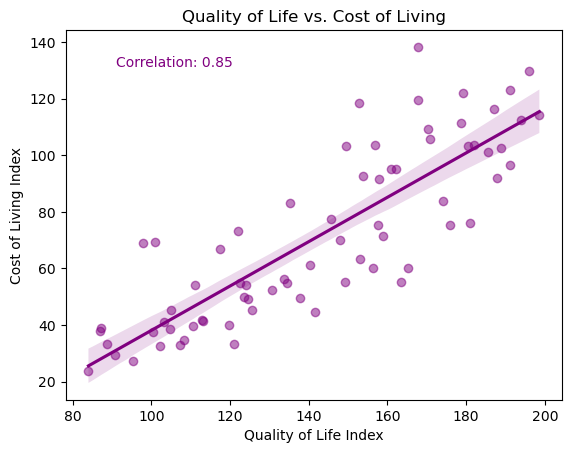

In [8]:
# scatter plot
plt.scatter(qol_data['Quality of Life Index'], qol_data['Cost of Living Index'], alpha=0.5, color='purple')
plt.title('Quality of Life vs. Cost of Living')
plt.xlabel('Quality of Life Index')
plt.ylabel('Cost of Living Index')

# regression line
sns.regplot(x='Quality of Life Index', y='Cost of Living Index', data=qol_data, scatter=False, color='purple')

# correlation
correlation = qol_data['Quality of Life Index'].corr(qol_data['Cost of Living Index'])
plt.annotate(f'Correlation: {correlation:.2f}', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=10, color='purple')

plt.show()

### Graph 2: The scatter plot explores the relationship between Happiness Score and Quality of Life Index for different countries in 2019. Each point represents a country, and there's a visible positive correlation, suggesting that countries with higher Quality of Life tend to have higher Happiness Scores. 

#### The positive correlation implies that as the overall quality of life improves, citizens of that country are more likely to report higher levels of happiness. This aligns with the intuitive expectation that factors contributing to a better quality of life, such as healthcare, safety, and economic prosperity, positively influence the subjective well-being of individuals.

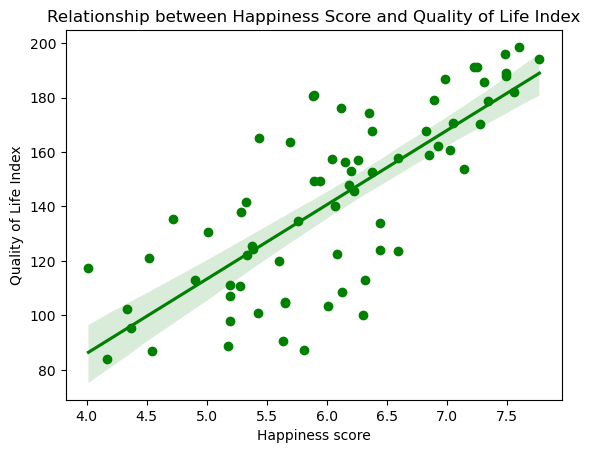

In [9]:
# scatter plot
plt.scatter(merged_data['Happiness score'], merged_data['Quality of Life Index'], color='green')
plt.title('Relationship between Happiness Score and Quality of Life Index')
plt.xlabel('Happiness Score')
plt.ylabel('Quality of Life Index')

# regression line
sns.regplot(x='Happiness score', y='Quality of Life Index', data=merged_data, scatter=False, color='green')

plt.show()

### Graph 3: The bar plot illustrates the importance of different features in predicting the Happiness Score
#### Features such as 'GDP per capita' and 'Social support' have higher importance values as you can see by the increased correlations.

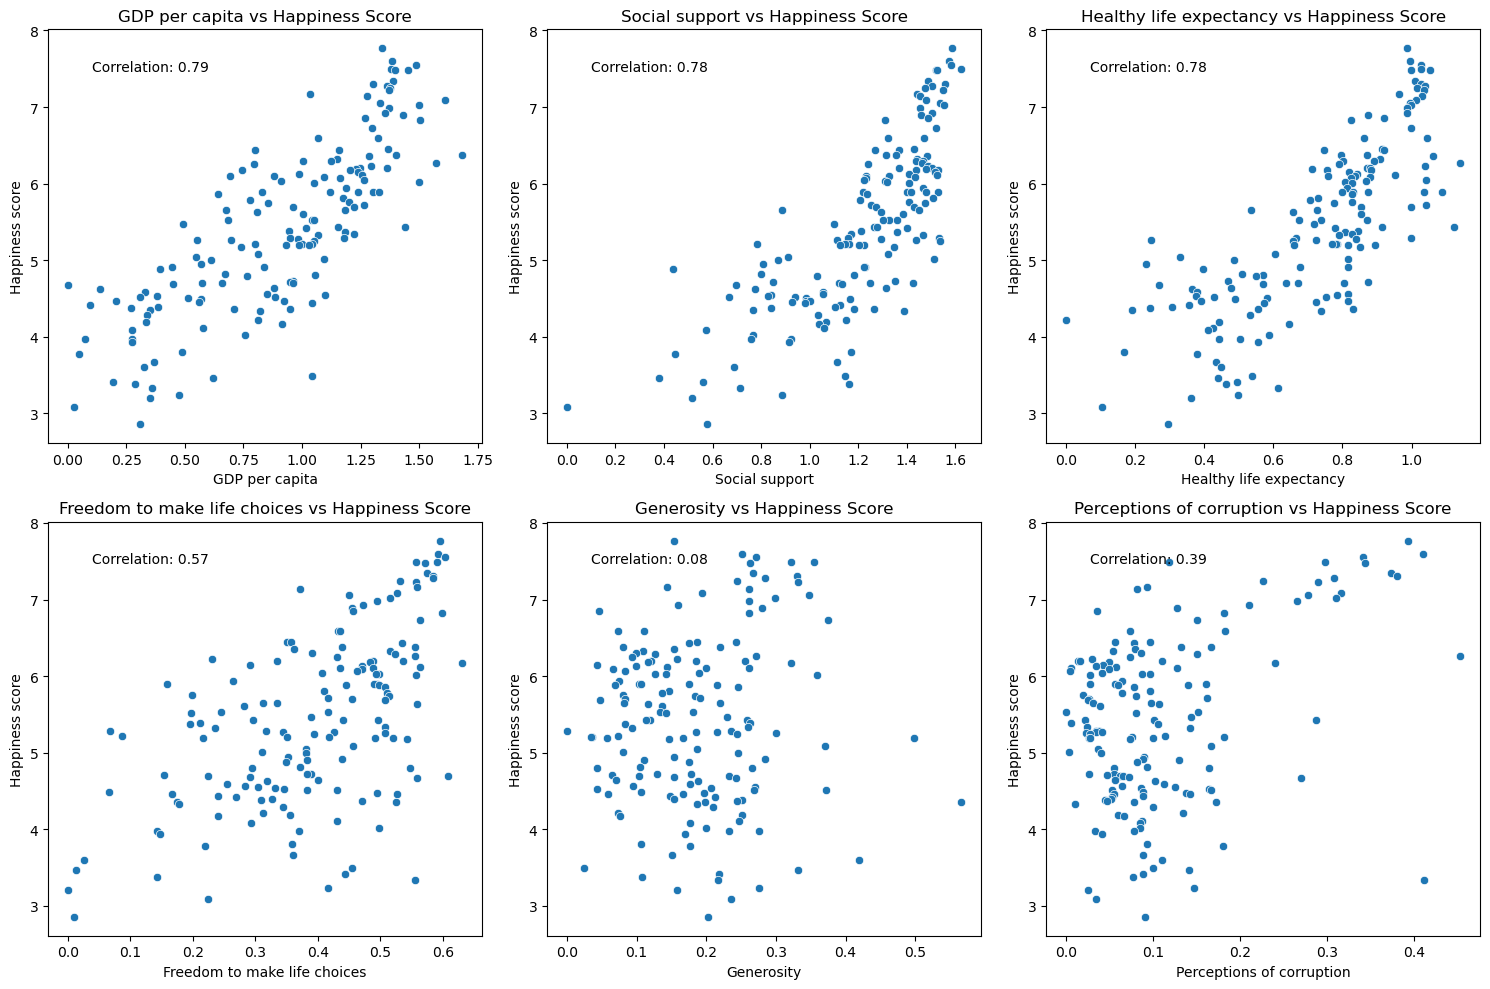

In [10]:
factors_full = ['Explained by: GDP per capita', 'Explained by: Social support', 
                'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 
                'Explained by: Generosity', 'Explained by: Perceptions of corruption']
factors_short = [factor.split(': ')[1] for factor in factors_full]  # Keep only the part after "Explained by:"
happiness_score = 'Happiness score'

plt.figure(figsize=(15, 10))

# subplots for each factor
for i, (factor_full, factor_short) in enumerate(zip(factors_full, factors_short), 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=merged_data[factor_full], y=merged_data[happiness_score])
    plt.title(f'{factor_short} vs Happiness Score')
    correlation = merged_data[factor_full].corr(merged_data[happiness_score])
    plt.annotate(f'Correlation: {correlation:.2f}', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=10)
    plt.xlabel(factor_short)
    plt.ylabel(happiness_score)

plt.tight_layout()
plt.show()

### Graph 4: This graph is a sample exploring the food dataset.  

#### The bar graphs shows the 5 most common food items across all countries and the consumption rates all normalized to population size

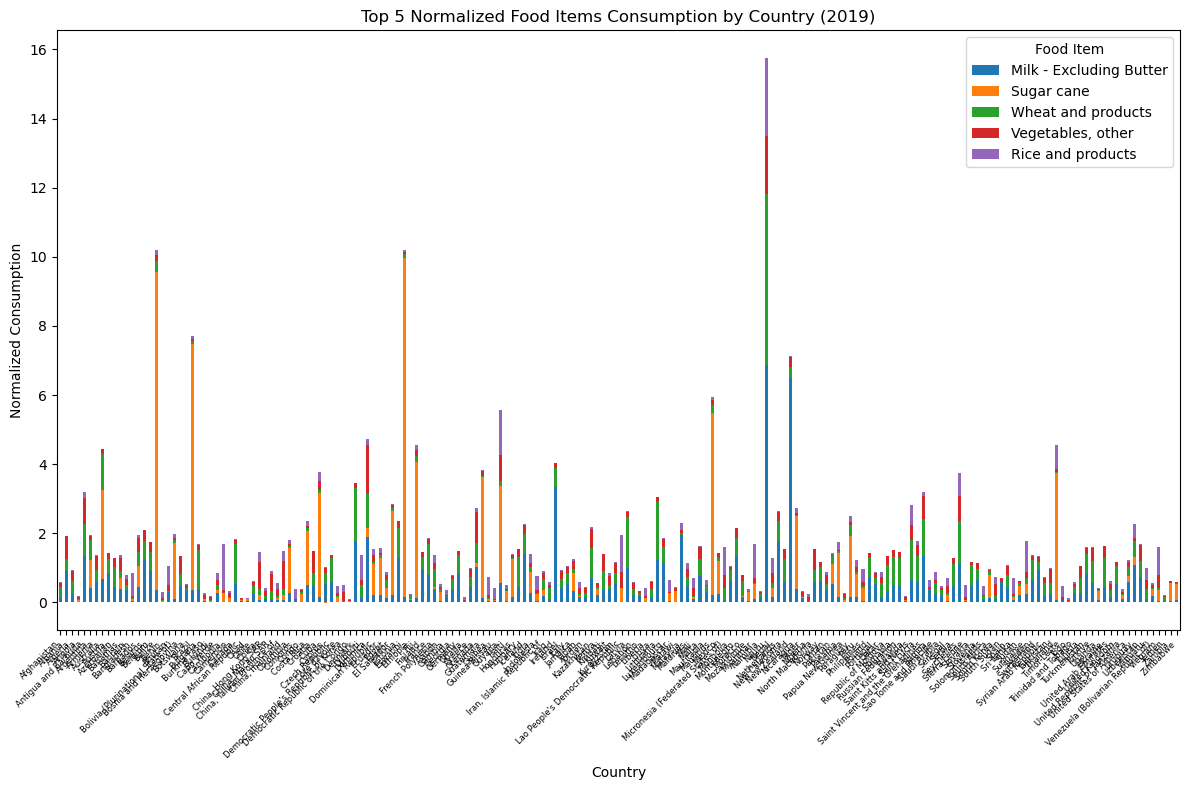

In [11]:
# extract total population
total_population = food_data[food_data['Element'] == 'Total Population - Both sexes'][['Area', 'Value']]
total_population = total_population.rename(columns={'Value': 'Population'})

# merge total population with the rest of the data
selected_data = pd.merge(food_data, total_population, on='Area', how='left')

# exclude the row corresponding to population when calculating normalized consumption
selected_data = selected_data[selected_data['Element'] != 'Total Population - Both sexes']

# calc normalized consumption by dividing food quantity by total population
selected_data['Normalized_Value'] = selected_data['Value'] / selected_data['Population']

# group data by country and item and calculate total normalized consumption
country_diet_totals = selected_data.groupby(['Area', 'Item'])['Normalized_Value'].sum().reset_index()

# pivot the table to have countries as rows, items as columns, and values as entries
pivoted_table = country_diet_totals.pivot(index='Area', columns='Item', values='Normalized_Value').fillna(0)

# plot a bar chart for the top N items
top_n = 5
top_items = pivoted_table.sum(axis=0).sort_values(ascending=False).head(top_n).index
pivoted_table_top_n = pivoted_table[top_items]

pivoted_table_top_n.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Top {} Normalized Food Items Consumption by Country (2019)'.format(top_n))
plt.xlabel('Country')
plt.ylabel('Normalized Consumption')
plt.legend(title='Food Item')
plt.xticks(rotation=45, ha='right', fontsize=6)  # Rotate labels for readability and adjust font size

plt.tight_layout()
plt.show()


### Graph 5: This graph displays the 10 most common food items across the 20 happiest countries

#### Just by visually comparing the two graphs you can see that in the happier countries, the most common food item milk while in the least happy countries the most common food item is sugar.

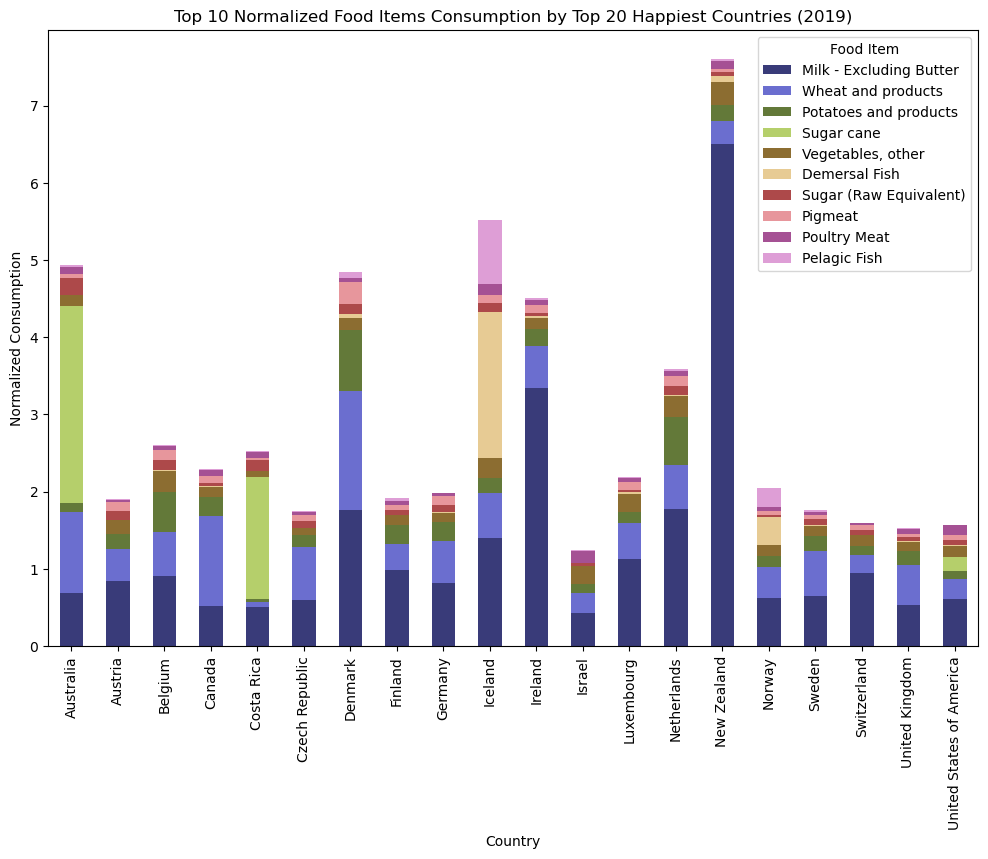

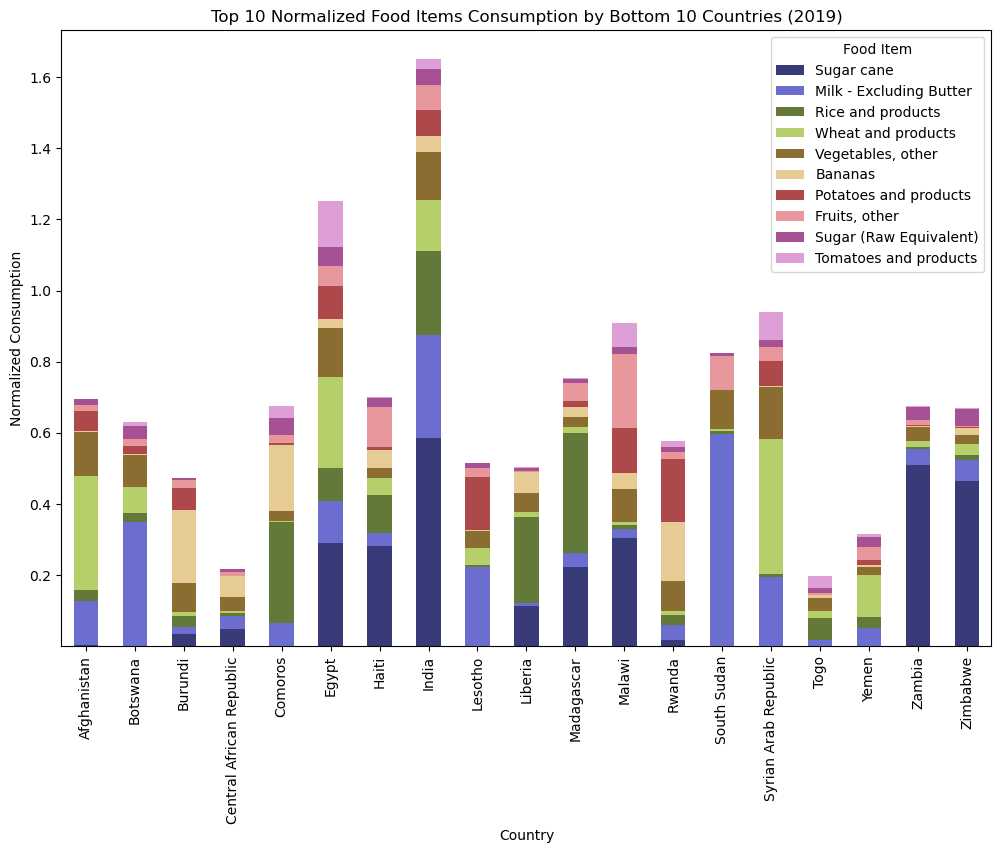

In [37]:
# Find the top 20 countries based on happiness score
top_20_countries = happiness_data.nlargest(20, 'Happiness score')['Country']

# Filter the country_diet_totals DataFrame for the top 10 countries
filtered_country_diet_totals = country_diet_totals[country_diet_totals['Area'].isin(top_10_countries)]

# Pivot the table to have countries as rows, items as columns, and values as entries
pivoted_table = filtered_country_diet_totals.pivot(index='Area', columns='Item', values='Normalized_Value').fillna(0)

# Plot a bar chart for the top N items (you can change N)
top_n = 10
top_items = pivoted_table.sum(axis=0).sort_values(ascending=False).head(top_n).index
pivoted_table_top_n = pivoted_table[top_items]

# Plotting the bar chart
color_palette = 'tab20b'
pivoted_table_top_n.plot(kind='bar', stacked=True, figsize=(12, 8), colormap=color_palette)
plt.title('Top {} Normalized Food Items Consumption by Top 20 Happiest Countries (2019)'.format(top_n))
plt.xlabel('Country')
plt.ylabel('Normalized Consumption')
plt.legend(title='Food Item')
plt.show()

# Find the bottom 20 countries based on happiness score
bottom_20_countries = happiness_data.nsmallest(20, 'Happiness score')['Country']

# Filter the country_diet_totals DataFrame for the top 10 countries
filtered_country_diet_totals = country_diet_totals[country_diet_totals['Area'].isin(bottom_20_countries)]

# Pivot the table to have countries as rows, items as columns, and values as entries
pivoted_table = filtered_country_diet_totals.pivot(index='Area', columns='Item', values='Normalized_Value').fillna(0)

# Plot a bar chart for the top N items (you can change N)
top_n = 10
top_items = pivoted_table.sum(axis=0).sort_values(ascending=False).head(top_n).index
pivoted_table_top_n = pivoted_table[top_items]

# Plotting the bar chart
color_palette = 'tab20b'
pivoted_table_top_n.plot(kind='bar', stacked=True, figsize=(12, 8), colormap=color_palette)
plt.title('Top {} Normalized Food Items Consumption by Bottom 10 Countries (2019)'.format(top_n))
plt.xlabel('Country')
plt.ylabel('Normalized Consumption')
plt.legend(title='Food Item')
plt.show()

In [42]:

# Calculate the correlation matrix between happiness scores and food items
correlation_matrix = pivoted_table.corrwith(selected_data['Happiness score'])

# Sort the correlations for high happiness scores
high_happiness_correlations = correlation_matrix[top_20_countries].sort_values(ascending=False)

# Sort the correlations for low happiness scores
low_happiness_correlations = correlation_matrix[bottom_20_countries].sort_values(ascending=True)

# Plot the top 10 correlated food items for high happiness scores
top_n = 10
plt.figure(figsize=(12, 6))
sns.barplot(x=high_happiness_correlations.head(top_n).values, y=high_happiness_correlations.head(top_n).index, orient='h')
plt.title(f'Top {top_n} Food Items Correlated with High Happiness Scores')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Food Item')
plt.show()

# Plot the top 10 correlated food items for low happiness scores
plt.figure(figsize=(12, 6))
sns.barplot(x=low_happiness_correlations.head(top_n).values, y=low_happiness_correlations.head(top_n).index, orient='h')
plt.title(f'Top {top_n} Food Items Correlated with Low Happiness Scores')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Food Item')
plt.show()

KeyError: "None of [Index(['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands', 'Switzerland',\n       'Sweden', 'New Zealand', 'Canada', 'Austria', 'Australia', 'Costa Rica',\n       'Israel', 'Luxembourg', 'United Kingdom', 'Ireland', 'Germany',\n       'Belgium', 'United States of America', 'Czech Republic'],\n      dtype='object', name='Item')] are in the [index]"

Top 10 Highly Correlated Food Item Pairs:
Lemons, Limes and products and Olives (including preserved): 0.98
Lemons, Limes and products and Nuts and products: 0.96
Nuts and products and Olives (including preserved): 0.94
Pigmeat and Pineapples and products: 0.91
Cream and Meat, Other: 0.91
Apples and products and Olives (including preserved): 0.90
Grapes and products (excl wine) and Wheat and products: 0.90
Apples and products and Wheat and products: 0.89
Apples and products and Oranges, Mandarines: 0.88
Apples and products and Nuts and products: 0.88


Top 10 Association Rules:
                          antecedents                consequents  support  \
1               (Apples and products)            (Fruits, other)     0.10   
2               (Apples and products)  (Milk - Excluding Butter)     0.10   
3                (Mutton & Goat Meat)      (Apples and products)     0.10   
4               (Apples and products)       (Mutton & Goat Meat)     0.10   
5               (Apples and products)    (Potatoes and products)     0.10   
6               (Apples and products)        (Vegetables, other)     0.10   
7               (Apples and products)       (Wheat and products)     0.10   
9   (Grapes and products (excl wine))              (Bovine Meat)     0.10   
10                      (Bovine Meat)  (Milk - Excluding Butter)     0.15   
11                      (Bovine Meat)    (Potatoes and products)     0.15   

    confidence  
1          1.0  
2          1.0  
3          1.0  
4          1.0  
5          1.0  
6          1.0  
7      

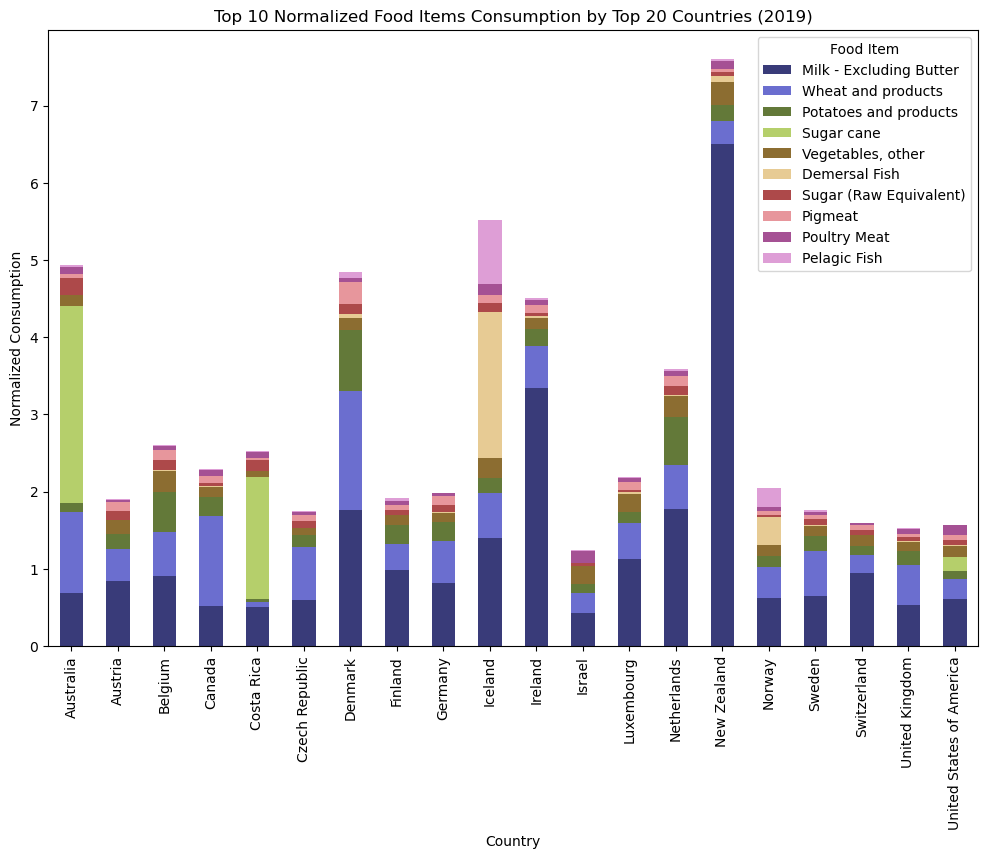

In [15]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

top_20_countries = happiness_data.nlargest(20, 'Happiness score')['Country']

# Filter the country_diet_totals DataFrame for the bottom 10 countries
filtered_country_diet_totals = country_diet_totals[country_diet_totals['Area'].isin(top_20_countries)]

# Pivot the table to have countries as rows, items as columns, and values as entries
pivoted_table = filtered_country_diet_totals.pivot(index='Area', columns='Item', values='Normalized_Value').fillna(0)

# Convert float values to boolean based on a threshold (e.g., 0.1)
threshold = 0.1
boolean_table = pivoted_table.applymap(lambda x: x > threshold)

# Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(boolean_table, min_support=0.1, use_colnames=True)

# Association rule mining
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

# Print the top 10 rules by confidence
top_rules = rules.nlargest(10, 'confidence')[['antecedents', 'consequents', 'support', 'confidence']]
print('Top 10 Association Rules:')
print(top_rules)

# Plotting the bar chart for top N items
top_n = 10
top_items = pivoted_table.sum(axis=0).sort_values(ascending=False).head(top_n).index
pivoted_table_top_n = pivoted_table[top_items]

color_palette = 'tab20b'
pivoted_table_top_n.plot(kind='bar', stacked=True, figsize=(12, 8), colormap=color_palette)
plt.title('Top {} Normalized Food Items Consumption by Top 20 Countries (2019)'.format(top_n))
plt.xlabel('Country')
plt.ylabel('Normalized Consumption')
plt.legend(title='Food Item')
plt.show()

### Graph 9: This graph displays the 10 most common food items across the 20 countries with the lowest happiness scores

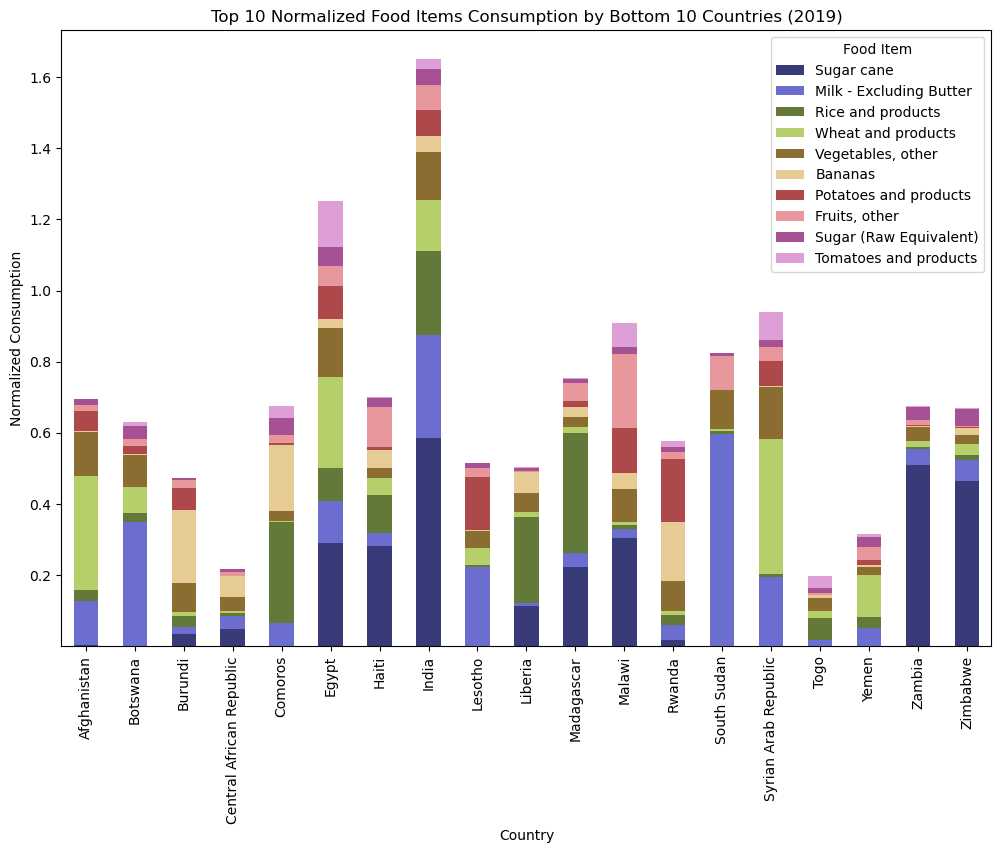

In [16]:
# Find the bottom 20 countries based on happiness score
top_10_countries = happiness_data.nsmallest(20, 'Happiness score')['Country']

# Filter the country_diet_totals DataFrame for the top 10 countries
filtered_country_diet_totals = country_diet_totals[country_diet_totals['Area'].isin(top_10_countries)]

# Pivot the table to have countries as rows, items as columns, and values as entries
pivoted_table = filtered_country_diet_totals.pivot(index='Area', columns='Item', values='Normalized_Value').fillna(0)

# Plot a bar chart for the top N items (you can change N)
top_n = 10
top_items = pivoted_table.sum(axis=0).sort_values(ascending=False).head(top_n).index
pivoted_table_top_n = pivoted_table[top_items]

# Plotting the bar chart
color_palette = 'tab20b'
pivoted_table_top_n.plot(kind='bar', stacked=True, figsize=(12, 8), colormap=color_palette)
plt.title('Top {} Normalized Food Items Consumption by Bottom 10 Countries (2019)'.format(top_n))
plt.xlabel('Country')
plt.ylabel('Normalized Consumption')
plt.legend(title='Food Item')
plt.show()

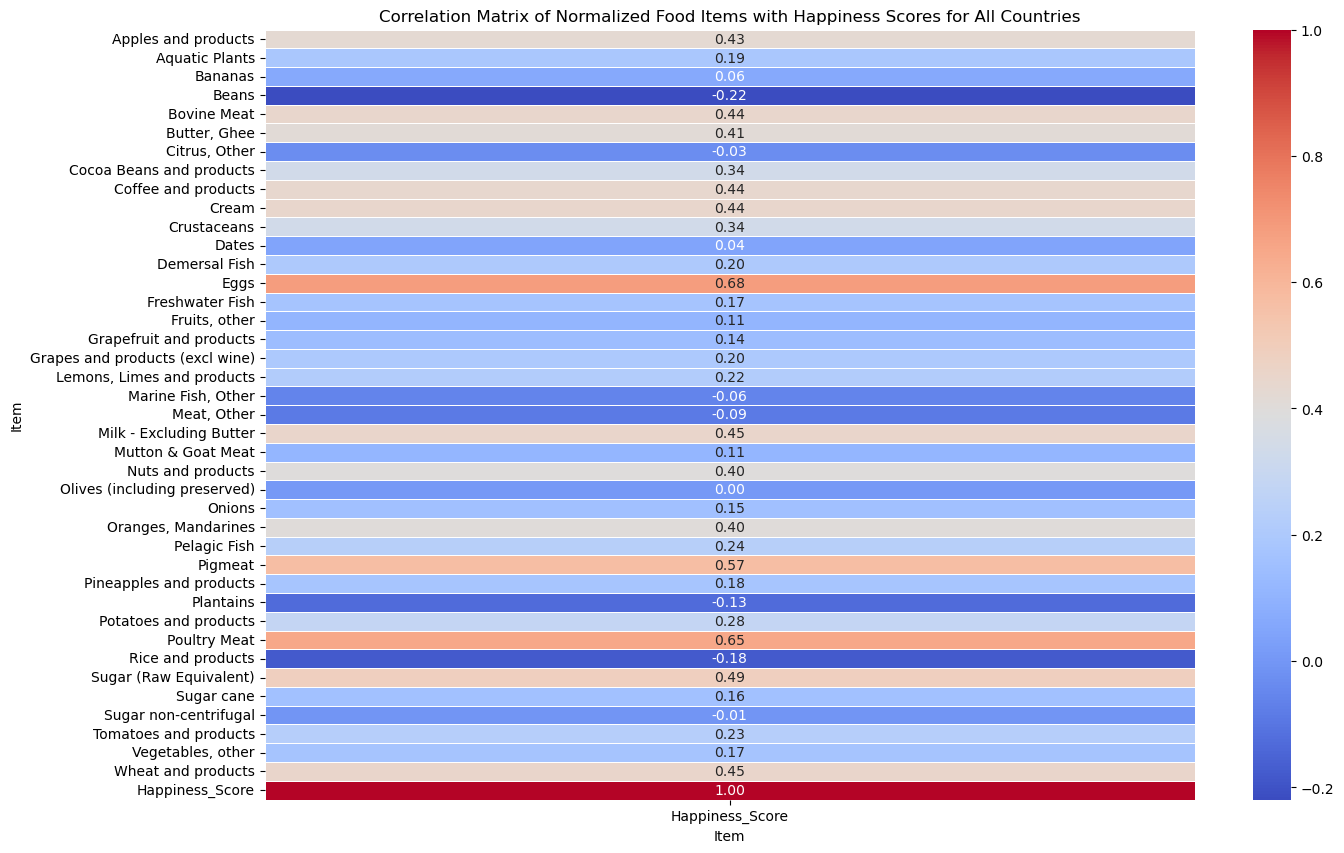

In [17]:
# Pivot the table to have countries as rows, items as columns, and values as entries
pivoted_table = country_diet_totals.pivot(index='Area', columns='Item', values='Normalized_Value').fillna(0)
exclude_columns = ['Meat, Aquatic Mammals', 'Population']
pivoted_table = pivoted_table.drop(columns=exclude_columns, errors='ignore')


# Include the happiness score in the pivoted table
pivoted_table['Happiness_Score'] = happiness_data.set_index('Country')['Happiness score']

# Calculate the correlation matrix
correlation_matrix = pivoted_table.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix[['Happiness_Score']], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Normalized Food Items with Happiness Scores for All Countries')
plt.show()

### Graph 10: This graph displays the highest correlations between food items and happiness score

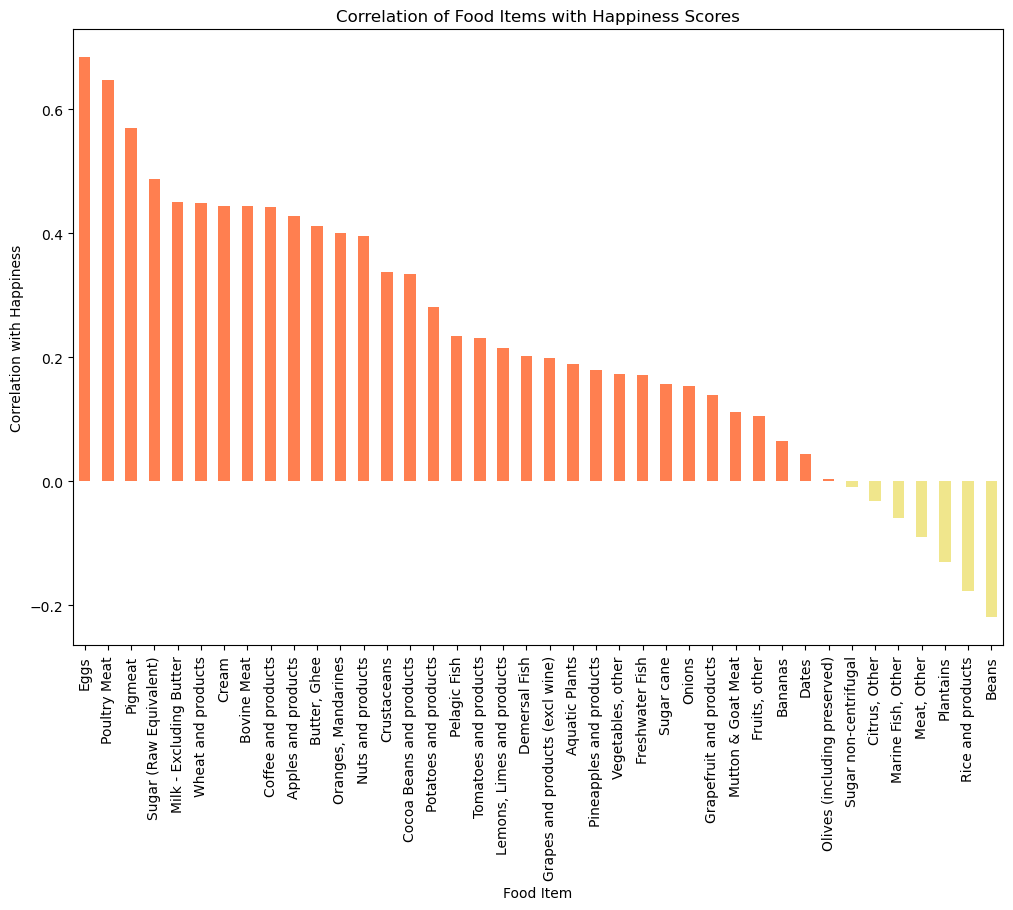

Top Positively Correlated Food Items:
Item
Eggs                       0.683899
Poultry Meat               0.647975
Pigmeat                    0.570250
Sugar (Raw Equivalent)     0.488660
Milk - Excluding Butter    0.450031
dtype: float64

Top Negatively Correlated Food Items:
Item
Marine Fish, Other   -0.058581
Meat, Other          -0.088948
Plantains            -0.129106
Rice and products    -0.177188
Beans                -0.219348
dtype: float64


In [18]:
# Exclude specific columns from the correlation analysis
exclude_columns = ['Meat, Aquatic Mammals', 'Population', 'Happiness_Score']
pivoted_table_filtered = pivoted_table.drop(columns=exclude_columns, errors='ignore')

# Calculate the correlation between each food item and happiness separately, excluding NaN values
correlation_with_happiness = pivoted_table_filtered.apply(lambda x: x.corr(happiness_data.set_index('Country')['Happiness score'], method='pearson', min_periods=1)).sort_values(ascending=False)

# Plot a bar chart to visualize the correlation values
plt.figure(figsize=(12, 8))
correlation_with_happiness.plot(kind='bar', color=(correlation_with_happiness > 0).map({True: 'coral', False: 'khaki'}))
plt.title('Correlation of Food Items with Happiness Scores')
plt.xlabel('Food Item')
plt.ylabel('Correlation with Happiness')
plt.show()

# Display the top and bottom correlated food items
top_correlated = correlation_with_happiness.head(5)
bottom_correlated = correlation_with_happiness.tail(5)

print("Top Positively Correlated Food Items:")
print(top_correlated)

print("\nTop Negatively Correlated Food Items:")
print(bottom_correlated)

In [19]:
# Merge Quality of Life data with Happiness data using a left join
merged_data = pd.merge(qol_data, happiness_data, on='Country', how='left')

# Merge with Food data using another left join
merged_data = pd.merge(merged_data, food_data, left_on='Country', right_on='Area', how='left')

# Display the merged data
print("Merged Data:")
print(merged_data.head())


Merged Data:
   Country  Quality of Life Index  Cost of Living Index  \
0  Denmark                  198.6                 114.4   
1  Denmark                  198.6                 114.4   
2  Denmark                  198.6                 114.4   
3  Denmark                  198.6                 114.4   
4  Denmark                  198.6                 114.4   

   Property Price to Income Ratio  Traffic Commute Time Index  \
0                            75.8                        79.4   
1                            75.8                        79.4   
2                            75.8                        79.4   
3                            75.8                        79.4   
4                            75.8                        79.4   

   Happiness score  Whisker-high  Whisker-low  Dystopia (1.88) + residual  \
0              7.6         7.667        7.534                       2.393   
1              7.6         7.667        7.534                       2.393   
2         

In [20]:
# Extract relevant features for clustering
features_for_clustering = [
    'Quality of Life Index',
    'Cost of Living Index',
    'Property Price to Income Ratio',
    'Traffic Commute Time Index',
    
    # Add more socio-economic and food-related features as needed
]

# Create a new DataFrame with selected features
clustering_data = merged_data[features_for_clustering]

# Display the relevant features for clustering
print("\nFeatures for Clustering:")
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
print(clustering_data.head())


Features for Clustering:
   Quality of Life Index  Cost of Living Index  \
0                  198.6                 114.4   
1                  198.6                 114.4   
2                  198.6                 114.4   
3                  198.6                 114.4   
4                  198.6                 114.4   

   Property Price to Income Ratio  Traffic Commute Time Index  
0                            75.8                        79.4  
1                            75.8                        79.4  
2                            75.8                        79.4  
3                            75.8                        79.4  
4                            75.8                        79.4  


/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_69868/2353186247.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data['Cluster'] = kmeans.fit_predict(clustering_data_standardized)


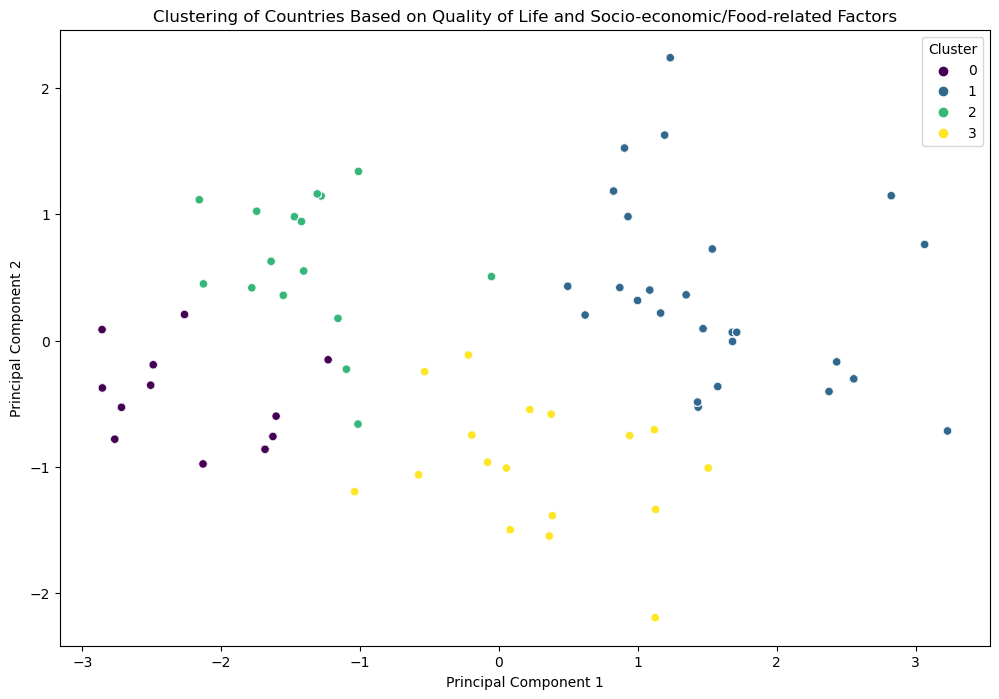

In [21]:
# Create a new DataFrame with selected features
clustering_data = merged_data[features_for_clustering]

# Standardize the data
scaler = StandardScaler()
clustering_data_standardized = scaler.fit_transform(clustering_data)

# Choose the number of clusters (you can experiment with different values)
num_clusters = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(clustering_data_standardized)

# Add the 'Cluster' column to the original merged_data DataFrame
merged_data['Cluster'] = clustering_data['Cluster']

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(clustering_data_standardized)
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_df['Cluster'] = clustering_data['Cluster']

# Scatter plot of the clustered data
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=reduced_df, palette='viridis', legend='full')
plt.title('Clustering of Countries Based on Quality of Life and Socio-economic/Food-related Factors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

/tmp/ipykernel_69868/2793111036.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed
/tmp/ipykernel_69868/2793111036.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids['geometry'] = centroids['geometry'].centroid


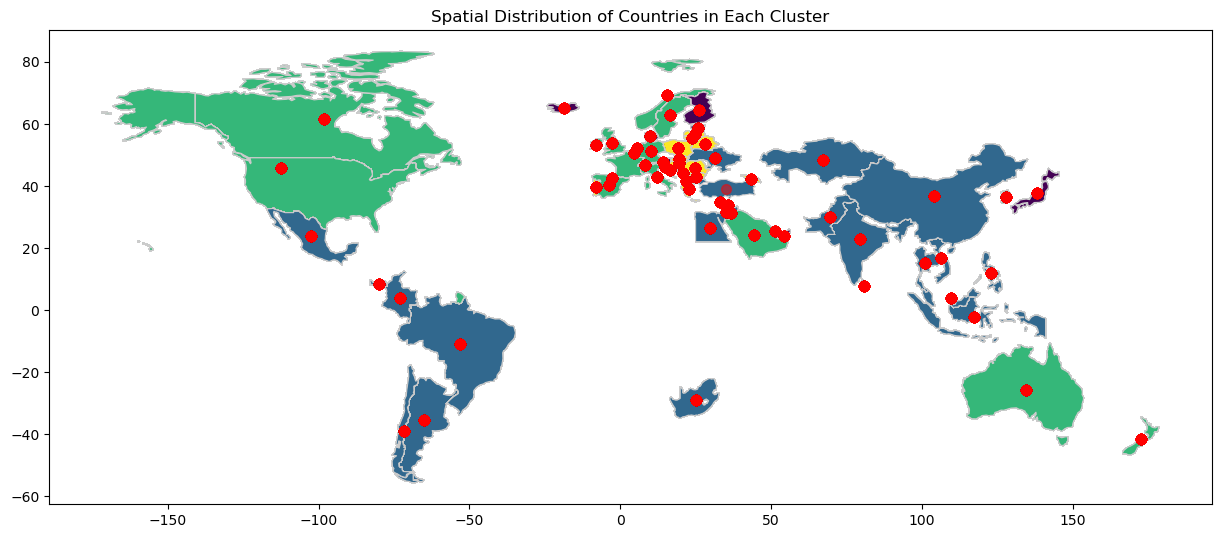

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Load the world map data from GeoPandas datasets
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge world map data with the merged_data DataFrame
world_map = world_map.merge(merged_data, left_on='name', right_on='Country', how='inner')

# Create a GeoDataFrame with the centroids of each country
centroids = world_map.copy()
centroids['geometry'] = centroids['geometry'].centroid

# Plot the map with clustered countries
fig, ax = plt.subplots(figsize=(15, 10))
world_map.plot(column='Cluster', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8')
centroids.plot(ax=ax, color='red', alpha=0.5, markersize=50, label='Centroids')


plt.title('Spatial Distribution of Countries in Each Cluster')
plt.show()


In [23]:
# Assuming 'qol_data', 'happiness_data', and 'food_data' are your original datasets

# Merge Quality of Life data with Happiness data
merged_data = pd.merge(qol_data, happiness_data, on='Country', how='inner')

# Merge with Food data
merged_data = pd.merge(merged_data, food_data, left_on='Country', right_on='Area', how='inner')

# Identify countries that didn't match in the first merge
unmatched_qol = pd.merge(qol_data, merged_data[['Country']], on='Country', how='left', indicator=True).query('_merge == "left_only"')

# Identify countries that didn't match in the second merge
unmatched_happiness = pd.merge(happiness_data, merged_data[['Country']], on='Country', how='left', indicator=True).query('_merge == "left_only"')

# Identify countries that didn't match in the third merge
unmatched_food = pd.merge(food_data, merged_data[['Country']], left_on='Area', right_on='Country', how='left', indicator=True).query('_merge == "left_only"')

# Combine all unmatched countries
unmatched_countries = pd.concat([unmatched_qol, unmatched_happiness, unmatched_food], ignore_index=True)

# Drop rows with NaN values
unmatched_countries = unmatched_countries.dropna(subset=['Country'])

# Display unmatched countries
print("Unmatched Countries:")
print(unmatched_countries[['Country']])

Unmatched Countries:
                         Country
0                      Singapore
1      Taiwan, Province of China
2                         Turkey
3                      Hong Kong
4                     Costa Rica
..                           ...
88                        Rwanda
89  Tanzania, United Republic of
90                   Afghanistan
91      Central African Republic
92                   South Sudan

[93 rows x 1 columns]


In [24]:
from fuzzywuzzy import process, fuzz

def fuzzy_merge(df1, df2, left_on, right_on, threshold=90):
    matches = {}

    # Iterate through each row in df1
    for idx, row in df1.iterrows():
        try:
            # Use fuzzywuzzy to find the best match in df2
            match, score, _ = process.extractOne(row[left_on], df2[right_on], scorer=fuzz.WRatio)

            # If the match meets the threshold, store it in the dictionary
            if score >= threshold:
                matches[row[left_on]] = match
        except TypeError:
            continue

    # Create a new column in df1 with the matched values
    df1['matched_country'] = df1[left_on].map(matches)

    # Merge the datasets on the matched column
    merged_data = pd.merge(df1, df2, left_on='matched_country', right_on=right_on, how='inner')

    return merged_data


# Example usage:
merged_data = fuzzy_merge(qol_data, happiness_data, 'Country', 'Country')
merged_data = fuzzy_merge(merged_data, food_data, 'Country', 'Area')

# Display the merged data
print("Merged Data:")
print(merged_data)

/opt/conda/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


KeyError: 'Country'

In [ ]:
print("Columns in happiness_data:", happiness_data.columns)
print("Columns in food_data:", food_data.columns)

In [ ]:
print(merged_data.head())

In [ ]:
foo